### Python | EDA | Linear Regression Project

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import os

### Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.
Time on App: Average time spent on App in minutes
Time on Website: Average time spent on Website in minutes
Length of Membership: How many years the customer has been a member.
** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
os.chdir('C:\\Users\\Avnish\\Documents\\Py-DS-ML-Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\11-Linear-Regression')

In [3]:
df = pd.read_csv('Ecommerce Customers')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
null_value=df.isnull().sum()
print("There is no null value in dataframe", null_value)

There is no null value in dataframe Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


In [7]:
#descriptive stat
df.describe(include='object').T

,count,unique,top,freq
Email,500,500,mstephenson@fernandez.com,1
Address,500,500,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",1
Avatar,500,138,SlateBlue,7


In [8]:
df.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


### EDA - Exploratory Data Analysis

Let's explore the data!

For the rest of the exercise we'll only be using the numerical data of the csv file.


In [28]:
sns.set_style('whitegrid')

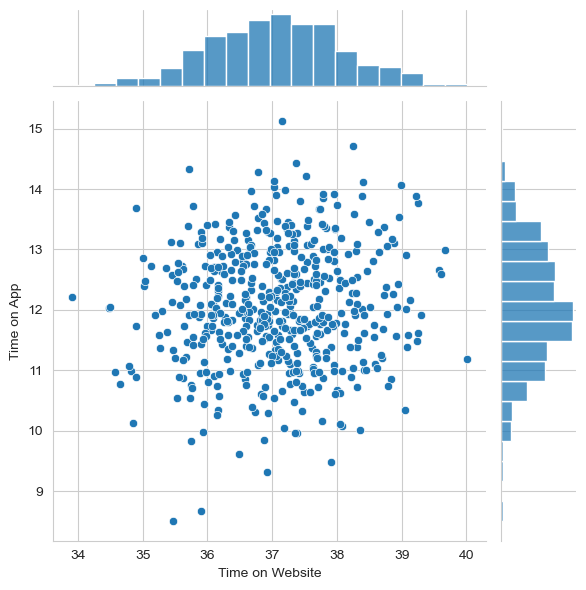

In [29]:
#create a joint plot to compare time on app and time on website columns
sns.jointplot(data=df, x= 'Time on Website', y= 'Time on App')

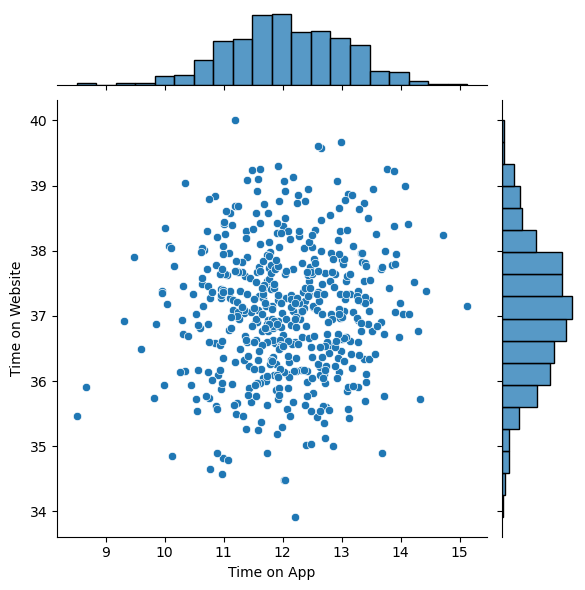

In [11]:
# lets create another joint plot but this time x variable is application
sns.jointplot(data=df, x= 'Time on App',y='Time on Website')

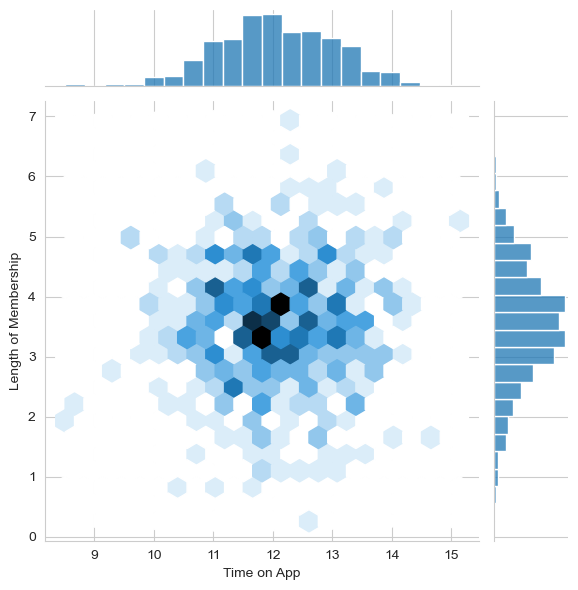

In [30]:
#** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=df)

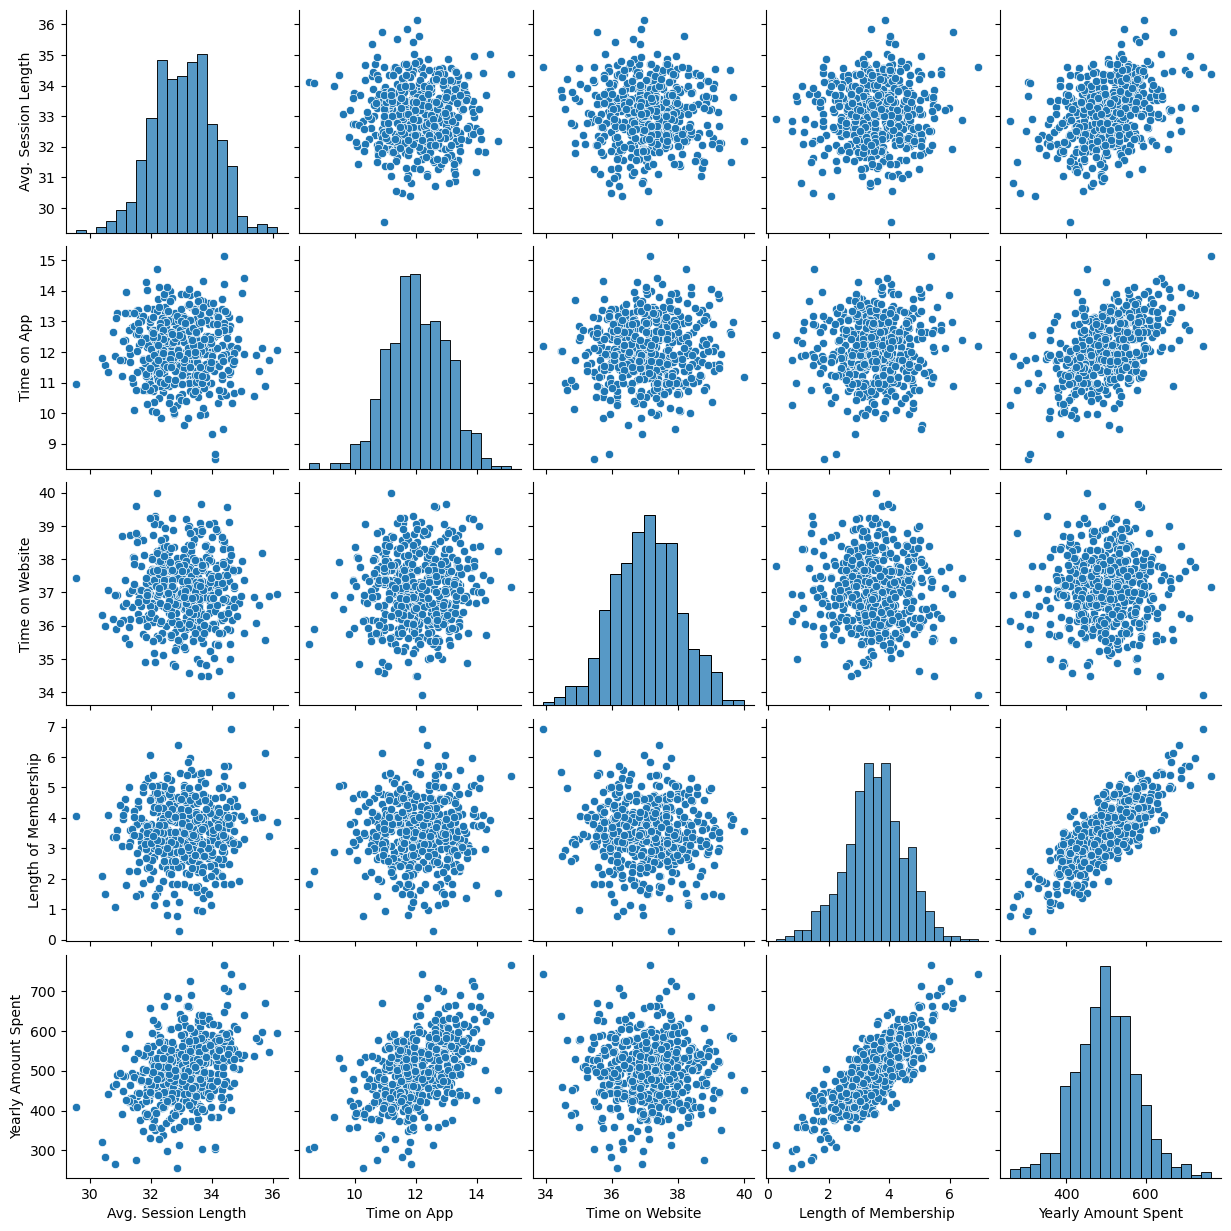

In [12]:
# so now let's create a pairplot for the whole data
sns.pairplot(df)

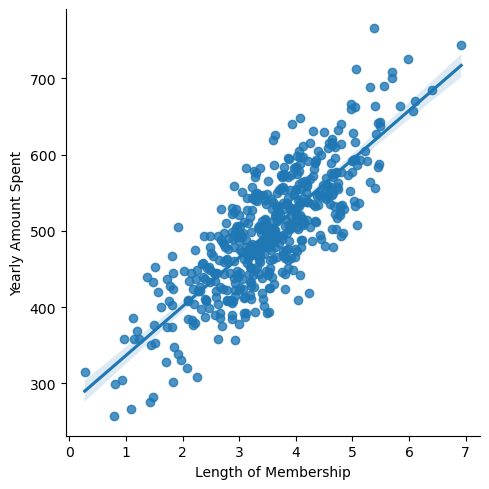

In [13]:
# lets create a linear model plot between lenght of membership vs yearly amount
sns.lmplot(data = df, x = 'Length of Membership', y= 'Yearly Amount Spent')

In [14]:
# lets jump in linear regression part

#### Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. ** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [15]:
# lets take the x variable as numeric columns and y variable as Yearly amount for train test and split
y = df['Yearly Amount Spent']

In [16]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training of model
Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [19]:
#train the model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
#Create an instance of a LinearRegression() model named lm.
lm = LinearRegression()

** Train/fit lm on the training data.**

In [22]:
lm.fit(X_train,y_train)

LinearRegression()

#### Print out the coefficients of the model

In [23]:
print('coefficients \n',lm.coef_)

coefficients 
 [25.98154972 38.59015875  0.19040528 61.27909654]


### Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [24]:
prediction = lm.predict(X_test)

Text(0.5, 0, 'actaual test data')

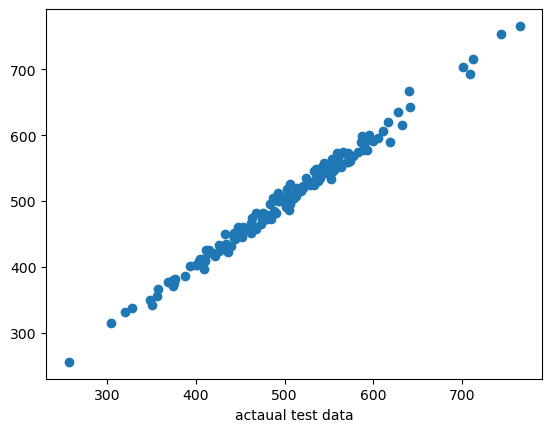

In [25]:
# so now lets compare predicted data with actual test data
plt.scatter(y_test,prediction)
plt.xlabel('actaual test data')


### Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [26]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.228148653430824
MSE: 79.81305165097419
RMSE: 8.93381506697862


# Conclusion

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [27]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


##### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.

**Do you think the company should focus more on their mobile app or on their website?**

This is tricky, there are two ways to think about this: Develop the Website to catch up to the performance of the mobile app, or develop the app more since that is what is working better. This sort of answer really depends on the other factors going on at the company, you would probably want to explore the relationship between Length of Membership and the App or the Website before coming to a conclusion!